In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/umi_dia.csv")
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
target = "Outcome"
dia_data = df[features]
dia_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
dia_data.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
dia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
dia_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
#Experiment Variables

num_of_clusters = [2,3,4,5,6,7,8,9]
dia_tree_criteria = ["gini", "entropy"]
topN = [1, 2, 3, 4, 5, 6, 7, 8]
depth = [2,3,4,5,6,7,8,9]
num_leaf = [4,5,6,7,8,9,10,11,12]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline


In [ ]:
results = []
res_frame = pd.DataFrame(columns= ["Accuracy", "Number_clusters", "Tree_Criteria", "Number_features", "Tree_depth", "Tree_leaves"])


In [ ]:
for clust in num_of_clusters:

  km_model = KMeans(n_clusters = clust)
  km_target = km_model.fit_predict(dia_data)
  dia_data["cluster"] = km_target

  X = dia_data[features]
  y = dia_data["cluster"]
  labels = []
  for i in range(0, clust-1):
    labels.append(i) 

  for crit in dia_tree_criteria:
    for num_ft in topN:
      for dep in depth:
        for leaf in num_leaf:
          exp_tree = DecisionTreeClassifier(criterion= crit, max_features = num_ft, max_depth = dep,max_leaf_nodes = leaf )
          tree_model = exp_tree.fit(X, y)
          tree_predict = tree_model.predict(X)
          acc = sklearn.metrics.accuracy_score(dia_data['cluster'],tree_predict)
          print("Accuracy:"+ str(acc)+ "===" +str(clust)+","+ str(crit)+","+  str(num_ft)+","+  str(dep)+","+  str(leaf) +","+ "\n")
          results.append(str(acc) +"," + str(clust)+","+ str(crit)+","+  str(num_ft)+","+  str(dep)+","+  str(leaf) +","+ "\n")
          res_frame.loc[len(res_frame)] = [acc,clust, crit, num_ft, dep, leaf]

Streaming output truncated to the last 5000 lines.
Accuracy:0.8971354166666666===7,entropy,6,4,6,

Accuracy:0.95703125===7,entropy,6,4,7,

Accuracy:0.8723958333333334===7,entropy,6,4,8,

Accuracy:0.8841145833333334===7,entropy,6,4,9,

Accuracy:0.92578125===7,entropy,6,4,10,

Accuracy:0.9466145833333334===7,entropy,6,4,11,

Accuracy:0.9153645833333334===7,entropy,6,4,12,

Accuracy:0.7786458333333334===7,entropy,6,5,4,

Accuracy:0.8697916666666666===7,entropy,6,5,5,

Accuracy:0.8997395833333334===7,entropy,6,5,6,

Accuracy:0.95703125===7,entropy,6,5,7,

Accuracy:0.9713541666666666===7,entropy,6,5,8,

Accuracy:0.9518229166666666===7,entropy,6,5,9,

Accuracy:0.89453125===7,entropy,6,5,10,

Accuracy:0.96484375===7,entropy,6,5,11,

Accuracy:0.96484375===7,entropy,6,5,12,

Accuracy:0.8697916666666666===7,entropy,6,6,4,

Accuracy:0.9322916666666666===7,entropy,6,6,5,

Accuracy:0.95703125===7,entropy,6,6,6,

Accuracy:0.9466145833333334===7,entropy,6,6,7,

Accuracy:0.9322916666666666===7,entropy

In [ ]:
len(results)

9216

In [ ]:
handl = open("capstone1_results.csv", "w")
for res in results:
  handl.write(res)
handl.close()

Number of clusters vs Accuracy

In [ ]:
Plot 1: Number of clusters vs accuracy

Accuracy is Y axis
Number of clusters is X axis

line diagram 

KeyboardInterrupt: ignored

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f0017f4bb90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py", line 178, in <lambda>
    target=child._parents: target.pop(sid))
KeyboardInterrupt


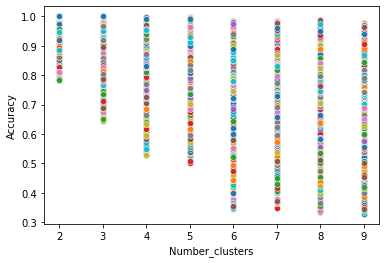

In [ ]:
for clust in num_of_clusters:
  for crit in dia_tree_criteria:
    for num_ft in topN:
      for dep in depth:
        for leaf in num_leaf:
          
          sns.scatterplot(x='Number_clusters', y='Accuracy', data=res_frame[(res_frame["Tree_Criteria"] == crit) & (res_frame["Number_features"] == num_ft) & (res_frame["Tree_depth"] == dep ) & (res_frame["Tree_leaves"] == leaf) ])


columns= ["Accuracy", "Number_clusters", "Tree_Criteria", "Number_features", "Tree_depth", "Tree_leaves"]

In [ ]:
res_frame.head()

,Accuracy,Number_clusters,Tree_Criteria,Number_features,Tree_depth,Tree_leaves
0,0.785156,2,gini,1,2,4
1,0.785156,2,gini,1,2,5
2,0.785156,2,gini,1,2,6
3,0.785156,2,gini,1,2,7
4,0.997396,2,gini,1,2,8


In [ ]:
(res_frame["Tree_Criteria"] == "gini") and (res_frame["Number_features"] == 1) and (res_frame["Tree_depth"] == 2) and (res_frame["Tree_leaves"] == 4)

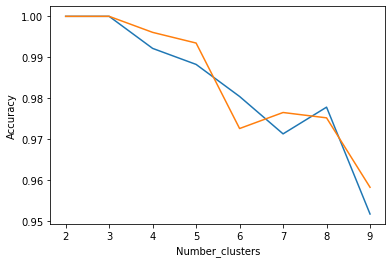

In [ ]:
import seaborn as sns


sns.lineplot(x='Number_clusters', y='Accuracy', data=res_frame[(res_frame["Tree_Criteria"] == "gini") & (res_frame["Number_features"] == 8) & (res_frame["Tree_depth"] == 4) & (res_frame["Tree_leaves"] == 12) ])




In [ ]:

sns.FacetGrid(res_frame, col ="Accuracy" )

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0037d9ec20> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 109080x216 with 505 Axes>

ValueError: ignored

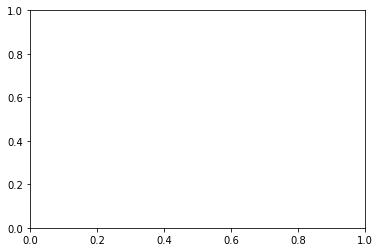

In [ ]:
plt.plot(num_of_clusters,res_frame["Accuracy"] )

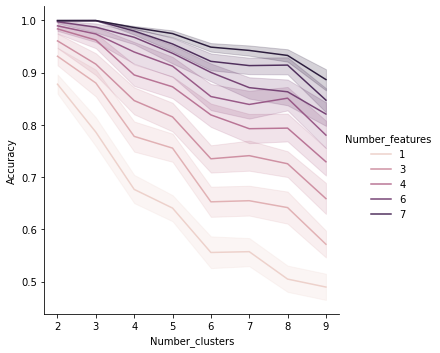

In [ ]:
#columns= ["Accuracy", "Number_clusters", "Tree_Criteria", "Number_features", "Tree_depth", "Tree_leaves"]
sns.relplot(data=res_frame[(res_frame["Tree_Criteria"] == "gini") ], x='Number_clusters', y='Accuracy', hue ="Number_features" , kind = "line")